In [3]:
# from preprocessing_dev import edge_detection

In [5]:
import numpy as np
from data_loader import load_npy
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

In [7]:
DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/backup/images_3")

In [9]:
images = load_npy(DATASET_PATH / "images_3_part_1/dataset_images_aug.npy")
annots = load_npy(DATASET_PATH / "images_3_part_1/dataset_annots_aug.npy")

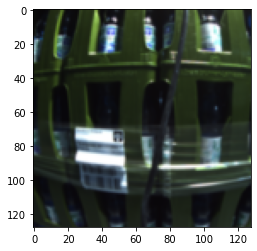

In [11]:
index = 7
sample_img = images[index,:,:,3:6]
plt.imshow(sample_img/255)
plt.show()

In [13]:
#img_ch = np.expand_dims(sample_img[:,:,0], axis =-1)
img_ch = np.uint8(images[:,:,0])

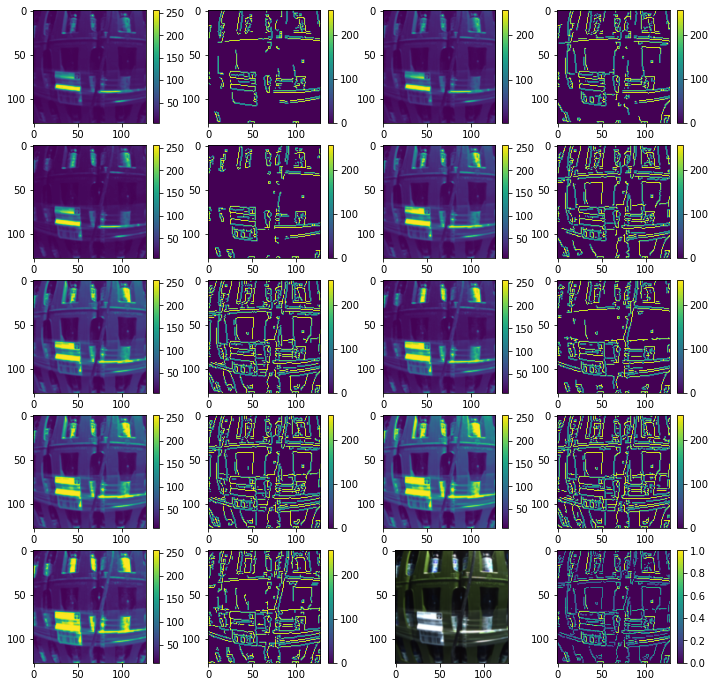

In [15]:
plt.figure(figsize=(12,12))
j = 0
edges_arr = []
for i in range(9):
    plt.subplot(5,4,j+1)
    img_ch = np.uint8(images[index,:,:,i])
    plt.imshow(img_ch)
    plt.colorbar()
    plt.subplot(5,4,j+2)
    edges = cv2.Canny(img_ch, 44, 89) # sigma 0.33
    edges_arr.append(edges)
    plt.imshow(edges)
    plt.colorbar()
    j += 2

plt.subplot(5,4,j+1)
sample_img = images[index,:,:,3:6]
plt.imshow(sample_img/255)

edges_arr = np.asarray(edges_arr)
summed = edges_arr.sum(axis=0)/(255*9)  # combining
summed = np.where(summed<0.4, 0, summed)     # clipping
plt.subplot(5,4,j+2)
plt.imshow(summed)
plt.colorbar()

plt.show()

In [17]:
edges_arr = np.asarray(edges_arr)
summed = edges_arr.sum(axis=0)/(255*9)   # combining
summed = np.where(summed<0.4, 0, 1) # clipping

In [19]:
product = cv2.bitwise_and(sample_img, sample_img, mask= np.uint8(summed))

In [21]:
scaling = 0.8
denom = scaling*255 + 255
res = (product*scaling + sample_img)/denom

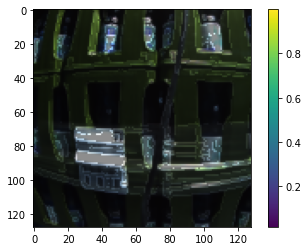

In [22]:
plt.imshow(res)
plt.colorbar()
plt.show()